In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
import sklearn
print(sklearn.__version__)

1.5.1


In [5]:
gold=pd.read_csv("gld_price_data[1].csv")

In [6]:
gold.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
gold.shape

(2290, 6)

In [9]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
#some statistical info
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [55]:
print(gold.dtypes)

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


In [56]:
gold['Date'] = pd.to_datetime(gold['Date'], errors='coerce')

In [57]:
correlation = gold.select_dtypes(include=[float, int]).corr()


In [58]:
gold_numeric = gold.select_dtypes(include=[float, int])
gold_numeric = gold_numeric.dropna()
correlation = gold_numeric.corr()


In [59]:
print(gold.head())
print(gold.dtypes)


        Date          SPX        GLD        USO     SLV   EUR/USD
0 2008-01-02  1447.160034  84.860001  78.470001  15.180  1.471692
1 2008-01-03  1447.160034  85.570000  78.370003  15.285  1.474491
2 2008-01-04  1411.630005  85.129997  77.309998  15.167  1.475492
3 2008-01-07  1416.180054  84.769997  75.500000  15.053  1.468299
4 2008-01-08  1390.189941  86.779999  76.059998  15.590  1.557099
Date       datetime64[ns]
SPX               float64
GLD               float64
USO               float64
SLV               float64
EUR/USD           float64
dtype: object


In [60]:
correlation = gold.corr()

<Axes: >

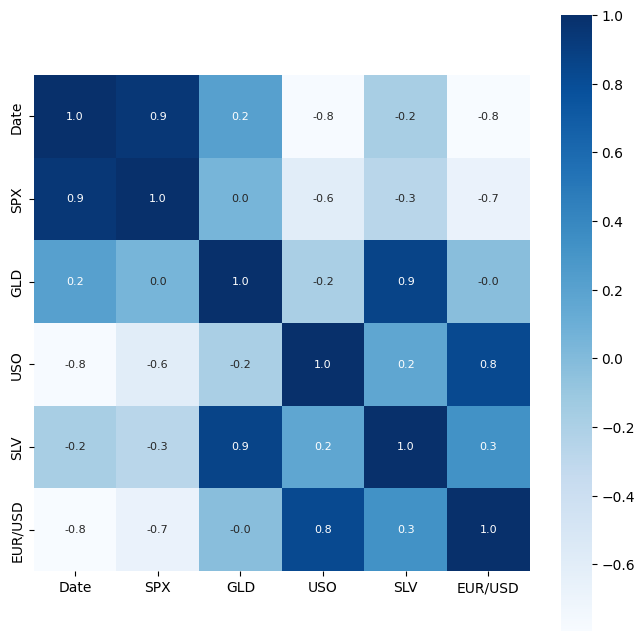

In [61]:
#constructing heatmap to understand correlarion

plt.figure(figsize =(8,8))
sns.heatmap(correlation ,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Blues")

In [63]:
#check the correlation values

print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\KRITIKA SINGH\AppData\Local\Temp\ipykernel_2900\927070902.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold["GLD"],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

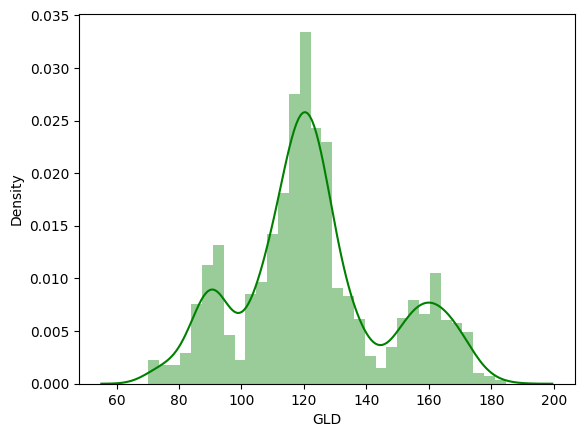

In [65]:
#check the distribution of the GLD price

sns.distplot(gold["GLD"],color='green')

Splitting the features and targets

In [24]:
X = gold.drop(['Date',"GLD"],axis=1)
Y=gold["GLD"]

In [32]:
# Example: Assume you have a dataset in a Pandas DataFrame called df
# and 'target_column' is the column you're trying to predict

# Feature variables
X = gold.drop(columns=['Date','GLD'],axis=1)

# Target variable
y = gold["GLD"]

# Now you can split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [33]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [34]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [35]:
print(gold.columns)

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')


Splitting the data into training data and test data

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y ,test_size=0.2,random_state=2)

Model Training
Random forest regressor

In [38]:
regressor = RandomForestRegressor(n_estimators=100)

In [39]:
#trainning the model

regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model evaluation 

In [45]:
#now this regression model is train now we can use this model to predict and then evaluate our model
test_data_prediction=regressor.predict(X_test)

In [46]:
print(test_data_prediction)

[168.67129972  81.97729968 116.2325002  127.57220026 120.82970111
 154.71299802 150.29239848 125.97750065 117.57319875 125.94930059
 116.52890094 172.00150021 141.94449924 168.17119869 115.12420001
 117.74660046 138.69460266 170.50230109 159.5352026  158.22219932
 155.08199959 125.15280025 175.95859982 157.19530352 125.14500051
  94.09449989  77.72330013 120.20539985 119.12979957 167.46150066
  88.0533008  125.39319983  91.38080091 117.69210026 121.09399899
 136.18200081 115.41830133 115.43370037 146.66719922 107.28620103
 104.4671027   87.04979762 126.52480062 118.03369985 153.00339938
 119.60929996 108.31249992 107.85759807  93.2002005  127.3066972
  74.21580072 113.61789931 121.20150031 111.23279931 118.72369892
 121.16879942 159.27989939 168.53880143 146.98519649  85.85429843
  94.37489992  86.84679918  90.64510035 118.89030083 126.46820083
 127.6771997  169.90149987 122.22429934 117.45589927  98.3963
 168.41650104 142.7333985  132.05500213 121.15510214 121.15669928
 119.65230079 1

In [48]:
#now we will compare the result or prediction with the actual output

# R square error matrics we will use

error_score = metrics.r2_score(Y_test,test_data_prediction)
print('r squared error:',error_score)

r squared error: 0.9891583729491908


Compare the actual values and predicted values in a plot

In [49]:
#converting intomlist to avoid error
Y_test = list(Y_test)

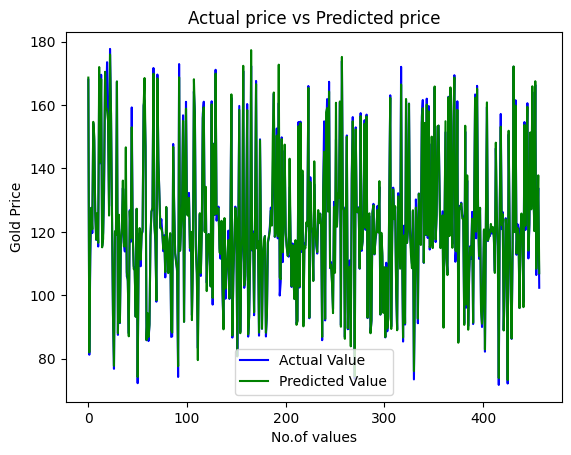

In [53]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title("Actual price vs Predicted price")
plt.xlabel('No.of values')
plt.ylabel("Gold Price")
plt.legend()
plt.show()